# KNN Classification and Regression

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df.fillna(df.mean(),inplace=True)

In [3]:
df.head(10) #Outcome is the dependent variable y here.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [5]:

plt.show(df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
kmeans.cluster_centers_
kmeans.labels_
unique, counts = np.unique(kmeans.labels_, return_counts=True)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<bound method _BaseKMeans.score of KMeans(n_clusters=4)>

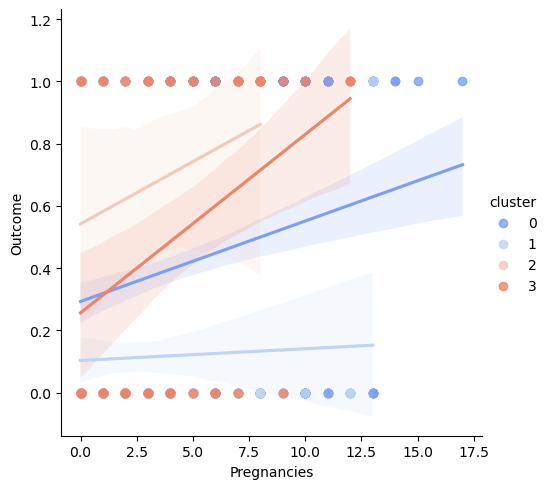

In [5]:
import seaborn as sns

df["cluster"] = kmeans.labels_

sns.lmplot(x='Pregnancies', y='Outcome', hue='cluster', data=df, palette='coolwarm',)
kmeans.inertia_
kmeans.score

In [6]:

features = df.iloc[:, :8]
outcome = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=42)

# Choose two points from the training set for distance calculation
num = 10
euclidean_distance = [0] * num
manhattan_distance = [0] * num
minkowski_distance = [0] * num

# Calculate distances for pairs of points in the training set
for i in range(num - 1):  # Avoid index out of range
    point1 = X_train.iloc[i, :3]
    point2 = X_train.iloc[i+1, :3]

    # Euclidean Distance
    euclidean_distance[i] = distance.euclidean(point1, point2)

    # Manhattan Distance
    manhattan_distance[i] = distance.cityblock(point1, point2)

    # Minkowski Distance
    p_value = 2  # You can change this to experiment with different Minkowski orders
    minkowski_distance[i] = distance.minkowski(point1, point2, p=p_value)

distances_df = pd.DataFrame({
    'Euclidean Distance': euclidean_distance,
    'Manhattan Distance': manhattan_distance,
    f'Minkowski Distance (p={p_value})': minkowski_distance
})

# Display the DataFrame
print(distances_df)

   Euclidean Distance  Manhattan Distance  Minkowski Distance (p=2)
0           30.414807           44.594816                 30.414807
1           45.705580           71.000000                 45.705580
2           22.383029           27.000000                 22.383029
3           40.804412           63.000000                 40.804412
4           11.874342           19.000000                 11.874342
5            4.334156            7.405184                  4.334156
6           29.940034           39.405184                 29.940034
7           54.350713           70.000000                 54.350713
8           28.442925           33.000000                 28.442925
9            0.000000            0.000000                  0.000000


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize variables to store the best K and its corresponding accuracy
best_k = 0
best_accuracy = 0

# Define a range of K values to try
k_values = list(range(1, 21))

# Loop over different values of K
for k in k_values:
    # Initialize the K-nearest neighbors classifier with current K
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn_classifier.fit(X_train, y_train)
    
    # Predicting the labels for the testing set
    y_test_pred = knn_classifier.predict(X_test)
    
    # Calculate accuracy for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"For k={k}, Test accuracy={test_accuracy}")
    
    # Update best K and accuracy if the current K performs better on the test set
    if test_accuracy > best_accuracy:
        best_k = k
        best_accuracy = test_accuracy

print(f"Optimal K value: {best_k}")
print(f"Best Test Accuracy: {best_accuracy}")




For k=1, Test accuracy=0.6428571428571429
For k=2, Test accuracy=0.6753246753246753
For k=3, Test accuracy=0.7142857142857143
For k=4, Test accuracy=0.7012987012987013
For k=5, Test accuracy=0.7402597402597403
For k=6, Test accuracy=0.7337662337662337
For k=7, Test accuracy=0.7207792207792207
For k=8, Test accuracy=0.7142857142857143
For k=9, Test accuracy=0.7142857142857143
For k=10, Test accuracy=0.7337662337662337
For k=11, Test accuracy=0.7532467532467533
For k=12, Test accuracy=0.7467532467532467
For k=13, Test accuracy=0.7402597402597403
For k=14, Test accuracy=0.7402597402597403
For k=15, Test accuracy=0.7402597402597403
For k=16, Test accuracy=0.7532467532467533
For k=17, Test accuracy=0.7532467532467533
For k=18, Test accuracy=0.7337662337662337
For k=19, Test accuracy=0.7402597402597403
For k=20, Test accuracy=0.7402597402597403
Optimal K value: 11
Best Test Accuracy: 0.7532467532467533


In [8]:
best_k=16 #16 is the optimal k value 
# Initialize the K-nearest neighbors classifier with optimal K
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Fit the model on the entire training set
best_knn_classifier.fit(X_train, y_train)

# Predicting the labels for the testing set
y_test_pred = best_knn_classifier.predict(X_test)

# Calculate accuracy for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with optimal K: {test_accuracy}")

# Print classification report
print(classification_report(y_test, y_test_pred))

Test accuracy with optimal K: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        99
           1       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



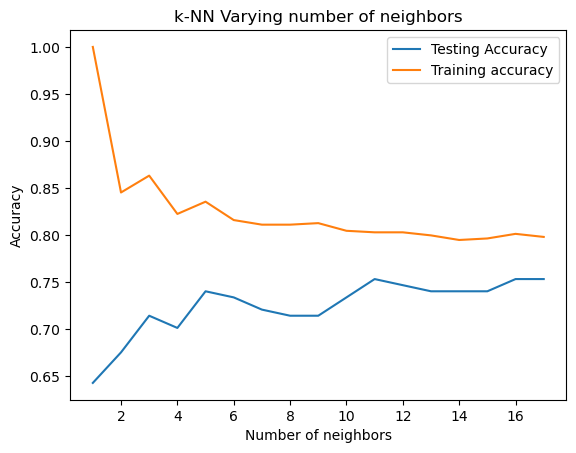

In [9]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,18)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

features = df.iloc[:, :8]
outcome = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=0)

# Choose two points from the training set for distance calculation
num = 10
euclidean_distance = [0] * num
manhattan_distance = [0] * num
minkowski_distance = [0] * num

# Calculate distances for pairs of points in the training set
for i in range(num - 1):  # Avoid index out of range
    point1 = X_train.iloc[i, :3]
    point2 = X_train.iloc[i+1, :3]

    # Euclidean Distance
    euclidean_distance[i] = distance.euclidean(point1, point2)

    # Manhattan Distance
    manhattan_distance[i] = distance.cityblock(point1, point2)

    # Minkowski Distance
    p_value = 2  # You can change this to experiment with different Minkowski orders
    minkowski_distance[i] = distance.minkowski(point1, point2, p=p_value)

distances_df = pd.DataFrame({
    'Euclidean Distance': euclidean_distance,
    'Manhattan Distance': manhattan_distance,
    f'Minkowski Distance (p={p_value})': minkowski_distance
})

# Display the DataFrame
print(distances_df)



   Euclidean Distance  Manhattan Distance  Minkowski Distance (p=2)
0           56.053546           74.000000                 56.053546
1           74.431176          102.000000                 74.431176
2           65.520989           91.000000                 65.520989
3           20.955431           34.405184                 20.955431
4           15.297059           18.000000                 15.297059
5           26.389499           31.405184                 26.389499
6           34.713110           47.000000                 34.713110
7          126.704380          158.000000                126.704380
8           52.402290           64.000000                 52.402290
9            0.000000            0.000000                  0.000000


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming you already have features and outcome defined
features = df.iloc[:, :8]
outcome = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.2, random_state=0)

# Define a range of K values to try
k_values = list(range(2, 21))

# Initialize variables to store the best K and its corresponding mean squared error
best_k = 0
best_mse = float('inf')

# Loop over different values of K
for k in k_values:
    # Initialize the K-nearest neighbors regressor with current K
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    
    # Predicting the outcomes for the testing set
    y_test_pred = knn_regressor.predict(X_test)
    
    # Calculating mean squared error for testing set
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"For k={k}, Mean Squared Error: {mse}")
    
    # Update best K and mean squared error if the current K performs better on the test set
    if mse < best_mse:
        best_k = k
        best_mse = mse

print(f"Optimal K value: {best_k}")
print(f"Best Mean Squared Error: {best_mse}")


For k=2, Mean Squared Error: 0.017857142857142856
For k=3, Mean Squared Error: 0.012987012987012988
For k=4, Mean Squared Error: 0.010957792207792208
For k=5, Mean Squared Error: 0.014545454545454547
For k=6, Mean Squared Error: 0.016414141414141412
For k=7, Mean Squared Error: 0.016034985422740525
For k=8, Mean Squared Error: 0.012581168831168832
For k=9, Mean Squared Error: 0.009940676607343272
For k=10, Mean Squared Error: 0.011753246753246757
For k=11, Mean Squared Error: 0.011001395298915959
For k=12, Mean Squared Error: 0.01204004329004329
For k=13, Mean Squared Error: 0.014447091370168298
For k=14, Mean Squared Error: 0.017956533262655713
For k=15, Mean Squared Error: 0.019884559884559883
For k=16, Mean Squared Error: 0.019962459415584416
For k=17, Mean Squared Error: 0.022693569406372176
For k=18, Mean Squared Error: 0.0237293570626904
For k=19, Mean Squared Error: 0.02379753210778142
For k=20, Mean Squared Error: 0.0263474025974026
Optimal K value: 9
Best Mean Squared Error: 0

In [12]:
# Rebuilding the K-nearest neighbors regressor model with the best K value

best_knn_regressor = KNeighborsRegressor(n_neighbors=best_k)

# Fit the model on the training data
best_knn_regressor.fit(X_train, y_train)

# Predicting the outcomes for the testing set
y_test_pred = best_knn_regressor.predict(X_test)

# Calculating mean squared error for testing set
best_mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error with optimal K: {best_mse}")


Mean Squared Error with optimal K: 0.009940676607343272


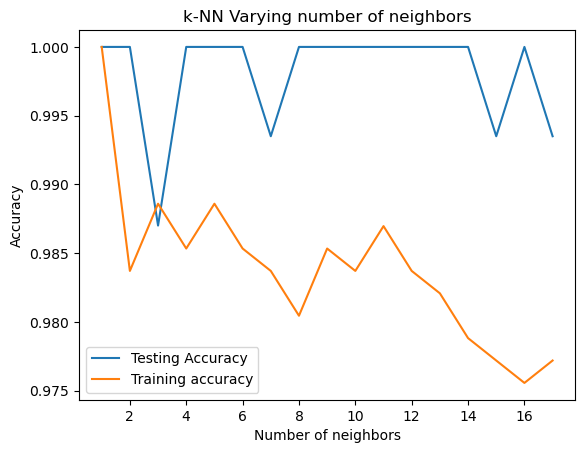

In [13]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,18)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    #Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

# Naive Bayes 

In [14]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
# Load the diabetes dataset
url = "diabetes.csv"  # Replace with the actual path to your dataset
df = pd.read_csv(url)

# Assume 'Outcome' is the target variable, and other columns are features
outcome_classes = df['Outcome'].unique()

# Create a frequency table for each feature with respect to the outcome classes
for column in df.columns[:-1]:  # Exclude the target variable
    frequency_table = pd.crosstab(df[column], df['Outcome'], margins=True, margins_name='Total')
    print(f"Frequency Table for {column}:\n{frequency_table}\n")



Frequency Table for Pregnancies:
Outcome        0    1  Total
Pregnancies                 
0             73   38    111
1            106   29    135
2             84   19    103
3             48   27     75
4             45   23     68
5             36   21     57
6             34   16     50
7             20   25     45
8             16   22     38
9             10   18     28
10            14   10     24
11             4    7     11
12             5    4      9
13             5    5     10
14             0    2      2
15             0    1      1
17             0    1      1
Total        500  268    768

Frequency Table for Glucose:
Outcome    0    1  Total
Glucose                 
0          3    2      5
44         1    0      1
56         1    0      1
57         2    0      2
61         1    0      1
...      ...  ...    ...
196        0    3      3
197        1    3      4
198        0    1      1
199        0    1      1
Total    500  268    768

[137 rows x 3 columns]

Frequen

In [15]:
 X= df.iloc[:, :8]
y = df.iloc[:, -1]
gnb = GaussianNB()  
gnb.fit(X, y)

# Get class labels
class_labels = gnb.classes_
# Calculate the likelihood for each feature given each class
likelihood_df = pd.DataFrame(columns=X.columns, index=class_labels)

for outcome_class in class_labels:
    for feature in X.columns:
        # Calculate mean for each class and feature
        mean = gnb.theta_[outcome_class, X.columns.get_loc(feature)]

        # Display mean in likelihood table
        likelihood_df.at[outcome_class, feature] = f"Mean: {mean}"

print("Likelihood Table:")
print(likelihood_df)


Likelihood Table:
               Pregnancies                   Glucose            BloodPressure  \
0              Mean: 3.298              Mean: 109.98             Mean: 68.184   
1  Mean: 4.865671641791045  Mean: 141.25746268656715  Mean: 70.82462686567165   

             SkinThickness                   Insulin                      BMI  \
0             Mean: 19.664              Mean: 68.792  Mean: 30.30419999999996   
1  Mean: 22.16417910447761  Mean: 100.33582089552239  Mean: 35.14253731343278   

    DiabetesPedigreeFunction                      Age  
0  Mean: 0.42973400000000017              Mean: 31.19  
1               Mean: 0.5505  Mean: 37.06716417910448  


In [16]:
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the classifier on the training set
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Gaussian Naive Bayes: {accuracy}\n")

Confusion Matrix:
[[79 20]
 [16 39]]

Accuracy with Gaussian Naive Bayes: 0.7662337662337663



In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


# Initialize Gaussian Naive Bayes classifier
mnb = MultinomialNB()

# Train the classifier on the training set
mnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mnb.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Gaussian Naive Bayes: {accuracy}\n")


Confusion Matrix:
[[74 25]
 [27 28]]

Accuracy with Gaussian Naive Bayes: 0.6623376623376623



In [18]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score


# Initialize Gaussian Naive Bayes classifier
bnb = BernoulliNB()

# Train the classifier on the training set
bnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = bnb.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Gaussian Naive Bayes: {accuracy}\n")
from sklearn.metrics import accuracy_score

Confusion Matrix:
[[98  1]
 [52  3]]

Accuracy with Gaussian Naive Bayes: 0.6558441558441559



# Spam Detection with multinomial NB

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data from the CSV file
data = pd.read_csv("spam.csv")

# Separate features and labels
X = data['text']
y = data['label_num']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer object to convert text into vectors
vectorizer = CountVectorizer()

# Transform text into numerical vectors
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Create a Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train_vect, y_train)

MultinomialNB()

In [20]:
# Prédire les étiquettes pour les données de test
y_pred = model.predict(X_test_vect)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9719806763285024
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



In [21]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP and TN values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

print("Confusion Matrix:")
print(conf_matrix)
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

Confusion Matrix:
[[729  13]
 [ 16 277]]
True Positives (TP): 277
True Negatives (TN): 729
